# 2、线性回归中的梯度下降法、实现线性回归中的梯度下降法

自己在稿纸上手写推导一下，其中有一个向量化的步骤是很常见的。

## 在线性回归模型中使用梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [2]:
X = x.reshape(-1, 1)

In [3]:
X.shape

(100, 1)

In [4]:
y.shape

(100,)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


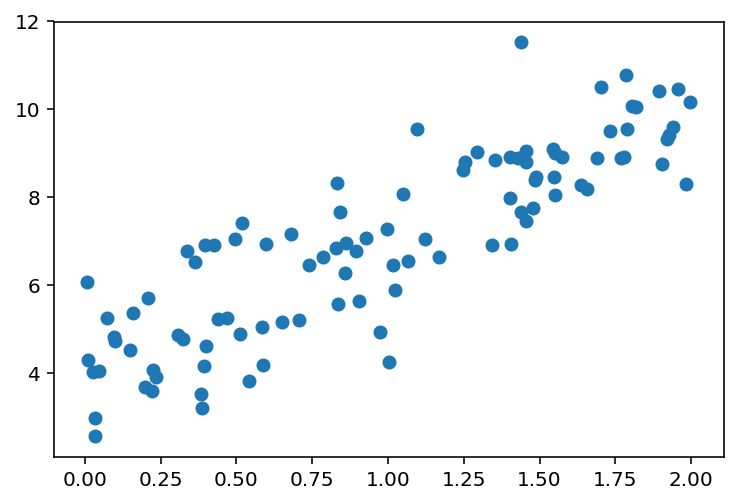

In [5]:
plt.scatter(x, y)
plt.show()

损失函数

$$
L = \frac{1}{m} \sum_{i=0}^{m}(y^{(i)} - \hat y^{(i)})^2
$$


$X_b$ 表示加上了偏置的特征矩阵。

`theta` 是一个列向量。

In [6]:
# 定义损失函数
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [7]:
# 这里 theta 是一个 n
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)

    for i in range(1, len(theta)):
        # 这一行代码要对照着公式多敲几遍
        res[i] = (X_b.dot(theta) - y).dot(X_b[:, i])
    return res * 2 / len(X_b)

In [8]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0

    # 多写几遍就顺溜了
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
        i_iter += 1
    return theta

**特别注意**：为了表示偏置这个概念，我们把 $X_0$（恒等于 1 ） 作为一个特征，它所对应的回归系数就是偏置。

In [9]:
X_b = np.hstack([np.ones((len(X), 1)), X])
X_b.shape[1]
initial_theta = np.zeros(X_b.shape[1])

eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

In [10]:
theta

array([4.02145786, 3.00706277])

下面封装我们的线性回归算法。

In [11]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [12]:
lin_reg.coef_

array([3.00706277])

In [13]:
lin_reg.intercept_

4.021457858204859